TEAM TECHIES
PROJECT TEAM ID:104

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [5]:
df.shape

(520, 17)

In [6]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['class'] = df['class'].map({'Positive':1,'Negative':0})
df['Polyuria'] = df['Polyuria'].map({'Yes':1,'No':0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes':1,'No':0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes':1,'No':0})
df['weakness'] = df['weakness'].map({'Yes':1,'No':0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes':1,'No':0})
df['Genital thrush'] = df['Genital thrush'].map({'Yes':1,'No':0})
df['visual blurring'] = df['visual blurring'].map({'Yes':1,'No':0})
df['Itching'] = df['Itching'].map({'Yes':1,'No':0})
df['Irritability'] = df['Irritability'].map({'Yes':1,'No':0})
df['delayed healing'] = df['delayed healing'].map({'Yes':1,'No':0})
df['partial paresis'] = df['partial paresis'].map({'Yes':1,'No':0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes':1,'No':0})
df['Alopecia'] = df['Alopecia'].map({'Yes':1,'No':0})
df['Obesity'] = df['Obesity'].map({'Yes':1,'No':0})

In [7]:
corrdata = df.corr()

Analysing the correlation between independent and dependent variables using seaborn

<AxesSubplot:>

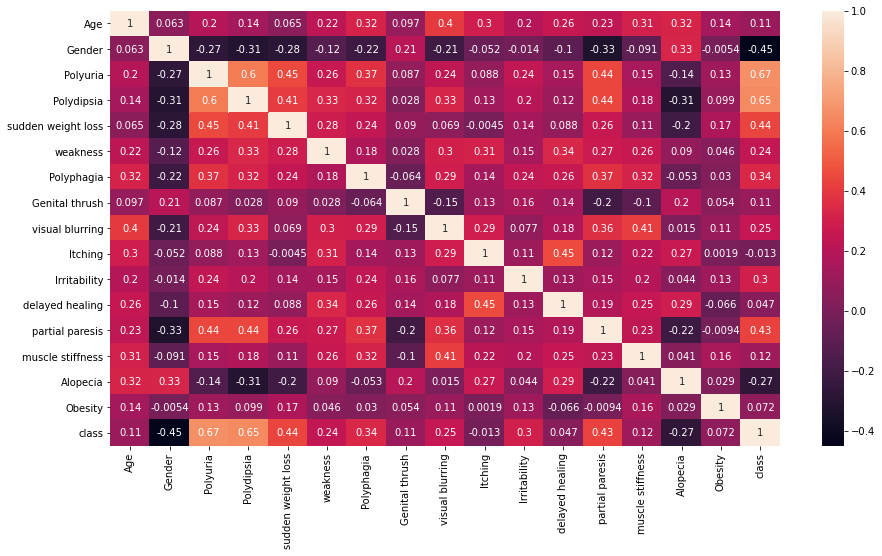

In [8]:
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

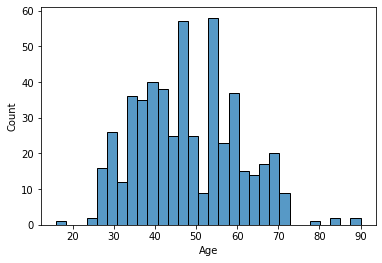

In [9]:
sns.histplot(df['Age'],bins=30)  

<AxesSubplot:xlabel='class', ylabel='Age'>

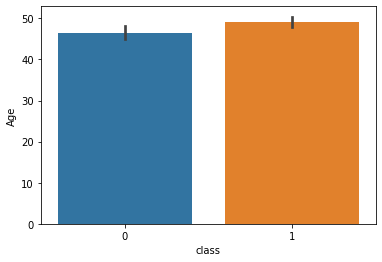

In [10]:
sns.barplot(x='class',y='Age',data=df)


<AxesSubplot:xlabel='class', ylabel='count'>

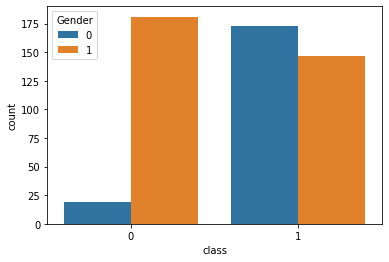

In [11]:
sns.countplot(x='class',data=df,hue='Gender')

<AxesSubplot:xlabel='Polyuria', ylabel='class'>

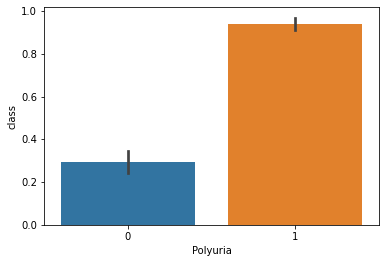

In [12]:
sns.barplot(x="Polyuria", y="class",data=df)

<AxesSubplot:xlabel='Polydipsia', ylabel='class'>

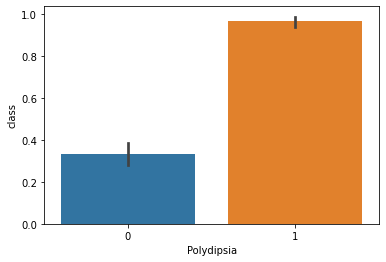

In [13]:
sns.barplot(x='Polydipsia',y='class',data=df)

<AxesSubplot:xlabel='class', ylabel='count'>

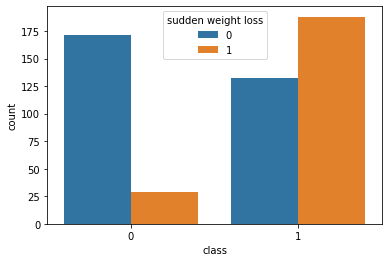

In [14]:
sns.countplot(x='class',data=df,hue='sudden weight loss')

<AxesSubplot:xlabel='Polyphagia', ylabel='class'>

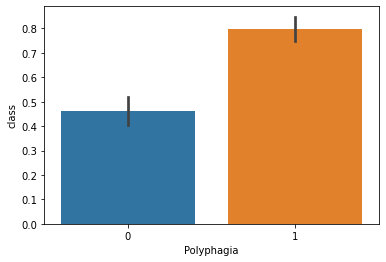

In [15]:
sns.barplot(x='Polyphagia',y='class',data=df)

<AxesSubplot:xlabel='class', ylabel='Genital thrush'>

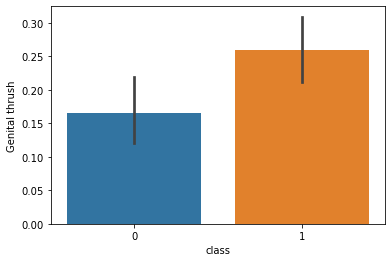

In [16]:
sns.barplot(x='class',y='Genital thrush',data=df)

<AxesSubplot:xlabel='class', ylabel='partial paresis'>

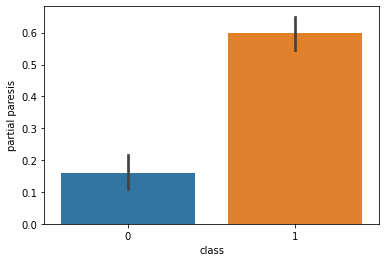

In [17]:
sns.barplot(x='class',y='partial paresis',data=df)

<AxesSubplot:xlabel='Alopecia', ylabel='class'>

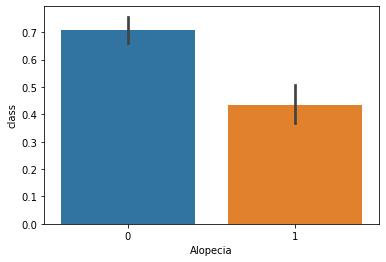

In [18]:
sns.barplot(x='Alopecia',y='class',data=df)


<AxesSubplot:xlabel='visual blurring', ylabel='class'>

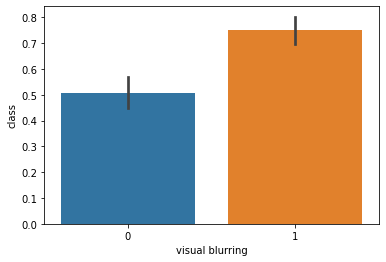

In [19]:
sns.barplot(x="visual blurring", y="class", data=df)

<AxesSubplot:xlabel='Itching', ylabel='class'>

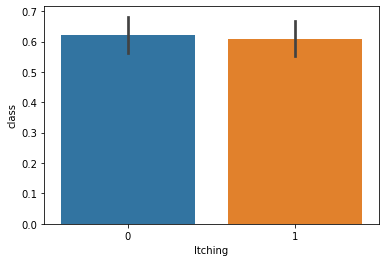

In [20]:
sns.barplot(x="Itching", y="class", data=df)

<AxesSubplot:xlabel='Obesity', ylabel='class'>

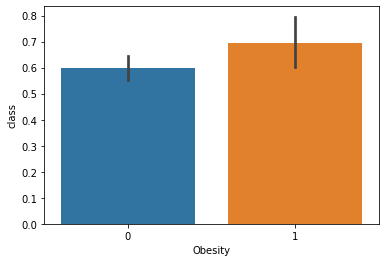

In [21]:
sns.barplot(x='Obesity',y='class',data=df)

<AxesSubplot:xlabel='Irritability', ylabel='class'>

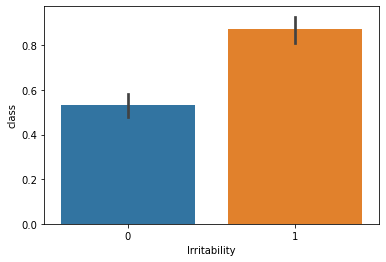

In [22]:
sns.barplot(x='Irritability',y='class',data=df)


In [23]:
X1 = df.iloc[:,0:-1]
Y1 = df.iloc[:,-1]

In [24]:
X1.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [25]:
X = df[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]
y = df['class']

SPLITTING THE DATA INTO TRAINING AND TESTING SETS

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## RANDOM FOREST CLASSIFIER

In [28]:
from sklearn.ensemble import RandomForestClassifier
estime=[]
for i in range(1,100):
    rc=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rc.fit(X_train,y_train)

In [29]:
predic1 = rc.predict(X_test)


In [30]:
Random_forest=accuracy_score(predic1,y_test)
print(accuracy_score(predic1,y_test))


0.9807692307692307


## NAIVE BAYES GAUSSIAN

In [31]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [32]:
pre2=gb.predict(X_test)

In [33]:
Naive_bayes_Gaussian_nb=accuracy_score(pre2,y_test)
print(accuracy_score(pre2,y_test))

0.8557692307692307


## LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [35]:
pre3=lg.predict(X_test)

In [36]:
logistic_regression=accuracy_score(pre3,y_test)
print(accuracy_score(pre3,y_test))

0.8942307692307693


## DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='entropy')
dc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
pre4=dc.predict(X_test)

In [49]:
Decisiontress_classifier=accuracy_score(pre4,y_test)
print(accuracy_score(pre4,y_test))

0.9615384615384616


## RESULT OF ALL THE ALGORITHMS

In [40]:
print('Logistic Regression:',logistic_regression)
print('Naive Bayes        :',Naive_bayes_Gaussian_nb)
print('Decision Tress     :',Decisiontress_classifier)
print('Random Forest      :',Random_forest)

Logistic Regression: 0.8942307692307693
Naive Bayes        : 0.8557692307692307
Decision Tress     : 0.9615384615384616
Random Forest      : 0.9807692307692307


## FROM THE ABOVE RESULTS, WE CAN SAY THAT, WE HAVE ACHIEVED HIGHEST ACCURACY USING THE RANDOM FOREST ALGORITHM